In [1]:
import numpy as np
from matplotlib import pyplot as plt
from plotting.nloSbottomXsec import xsecF

### New Scan

In [2]:
data = np.genfromtxt('./CDFOdata_2112_01499v3_Fig9.dat',skip_header=7)

In [3]:
masses_tauNew = []
lumi = 50.0
nMax = 500000
for pt in data:
    msb = pt[2]
    mn1 = pt[0]
    tau_ns = 1e9*pt[4]/3e8
    xsec = xsecF(msb)
    mcEvents = min(nMax,xsec*1e3*lumi)
    masses_tauNew.append([mn1,msb,tau_ns,mcEvents])

masses_tauNew = sorted(masses_tauNew)
print(len(masses_tauNew))
ptsNew = np.array(masses_tauNew)


438


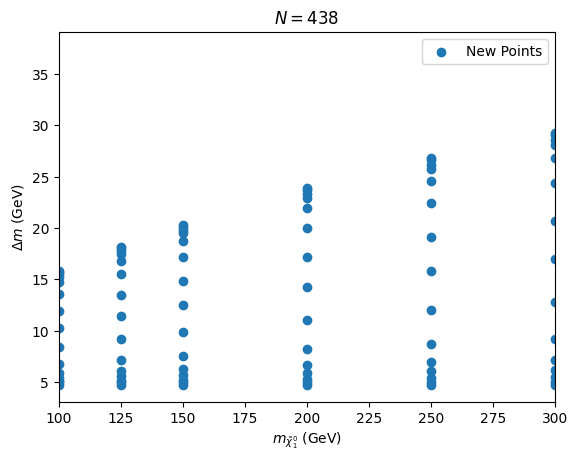

In [4]:

mN1 = ptsNew[:,0]
deltaM = ptsNew[:,1]-mN1
plt.scatter(mN1,deltaM,label='New Points')
plt.legend()
# plt.xscale('log')
plt.xlim(100,300)
# plt.ylim(25.,2000.)
plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.title(r'$N = %i$' %len(ptsNew))
plt.show()

In [5]:
ptsNewLight = ptsNew[ptsNew[:,1] < 1000.]
print(len(ptsNewLight))

210


In [9]:
# ptsNewLong = ptsNew[(ptsNew[:,0] == 100.0) & ((ptsNew[:,1]-ptsNew[:,0]) > 10.0)]
ptsNewLong = ptsNew[(ptsNew[:,0] < 300.0) 
                    # & (ptsNew[:,2] > 0.1) 
                    & (ptsNew[:,0] >= 200.0) 
                    & ((ptsNew[:,1]-ptsNew[:,0]) > 10.0)
                    & ((ptsNew[:,1]-ptsNew[:,0]) < 25.0)]
print(len(ptsNewLong))
ptsIni = sorted([("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2]) for pt in ptsNewLong])
print(str(ptsIni).replace("'", ""))

14
[(200.00, 211.06, 5.83e-01), (200.00, 214.31, 3.17e-01), (200.00, 217.17, 1.90e-01), (200.00, 220.04, 1.02e-01), (200.00, 221.95, 5.30e-02), (200.00, 222.91, 2.96e-02), (200.00, 223.29, 2.00e-02), (200.00, 223.67, 1.03e-02), (200.00, 223.86, 5.40e-03), (250.00, 262.03, 4.74e-01), (250.00, 265.78, 2.52e-01), (250.00, 269.09, 1.53e-01), (250.00, 272.40, 8.38e-02), (250.00, 274.61, 4.45e-02)]


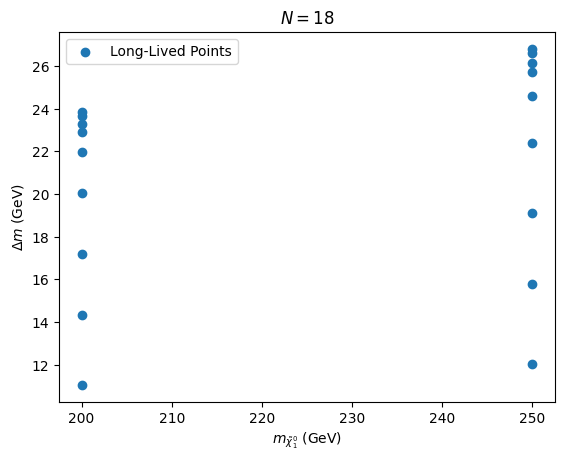

In [10]:

mN1 = ptsNewLong[:,0]
deltaM = ptsNewLong[:,1]-mN1
plt.scatter(mN1,deltaM,label='Long-Lived Points')
plt.legend()
# plt.xscale('log')
# plt.xlim(100,300)
# plt.ylim(25.,2000.)
plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.title(r'$N = %i$' %len(ptsNewLong))
plt.show()

In [ ]:
ptsIni = sorted([("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2]) for pt in ptsNewLight])
print(str(ptsIni).replace("'", ""))

[(100.00, 104.75, 5.66e+00), (100.00, 105.00, 3.98e+00), (100.00, 105.08, 3.75e+00), (100.00, 105.41, 3.09e+00), (100.00, 105.86, 2.52e+00), (100.00, 106.74, 1.79e+00), (100.00, 108.40, 1.05e+00), (100.00, 110.28, 6.00e-01), (100.00, 111.94, 3.49e-01), (100.00, 113.61, 1.77e-01), (100.00, 114.71, 9.01e-02), (100.00, 115.27, 5.15e-02), (100.00, 115.49, 3.64e-02), (100.00, 115.71, 2.15e-02), (100.00, 115.82, 1.40e-02), (125.00, 129.75, 6.10e+00), (125.00, 130.00, 4.11e+00), (125.00, 130.15, 3.68e+00), (125.00, 130.56, 2.94e+00), (125.00, 131.09, 2.32e+00), (125.00, 132.17, 1.57e+00), (125.00, 134.18, 8.78e-01), (125.00, 136.46, 4.97e-01), (125.00, 138.48, 2.92e-01), (125.00, 140.49, 1.49e-01), (125.00, 141.83, 7.63e-02), (125.00, 142.50, 4.30e-02), (125.00, 142.77, 2.99e-02), (125.00, 143.04, 1.68e-02), (125.00, 143.18, 1.02e-02), (150.00, 154.75, 6.50e+00), (150.00, 155.00, 4.23e+00), (150.00, 155.22, 3.60e+00), (150.00, 155.68, 2.80e+00), (150.00, 156.30, 2.15e+00), (150.00, 157.54, 1.

#### Points requiring more stas

In [ ]:
ptsNewMoreStats = ptsNew[(ptsNew[:,1] < 500.) & (ptsNew[:,1] >= 400.) & (ptsNew[:,1]-ptsNew[:,0] >= 15.)]
print(len(ptsNewMoreStats))

16


#### Split runs into at most 75k batches

In [ ]:
masses_tauNew_split = []
for pt in masses_tauNew:
    if pt[1] >= 500.:
        continue
    if pt[1] < 150.:
        continue
    if pt[1]-pt[0] < 20.0:
        continue
    if pt[3] < 50000:
        continue
    nbatches = pt[3]/75000.
    ntot = 0
    for n in range(int(nbatches)+1):
        nevts = min(75000,pt[3]-ntot)
        if nevts <= 0:
            continue
        ntot += nevts
        masses_tauNew_split.append([pt[0],pt[1],pt[2],nevts])

In [ ]:
ptsIni = sorted([("%1.0f" %pt[0], "%1.1f" %pt[1], "%1.1e" %pt[2], "%i" %pt[3]) for pt in masses_tauNew_split])
print(str(ptsIni).replace("'", ""))
print(len(masses_tauNew_split))

[(150, 170.1, 1.4e-02, 50000), (150, 170.1, 1.4e-02, 75000), (150, 170.1, 1.4e-02, 75000), (150, 170.1, 1.4e-02, 75000), (150, 170.1, 1.4e-02, 75000), (150, 170.1, 1.4e-02, 75000), (150, 170.1, 1.4e-02, 75000), (150, 170.3, 7.9e-03, 50000), (150, 170.3, 7.9e-03, 75000), (150, 170.3, 7.9e-03, 75000), (150, 170.3, 7.9e-03, 75000), (150, 170.3, 7.9e-03, 75000), (150, 170.3, 7.9e-03, 75000), (150, 170.3, 7.9e-03, 75000), (200, 220.0, 1.0e-01, 50000), (200, 220.0, 1.0e-01, 75000), (200, 220.0, 1.0e-01, 75000), (200, 220.0, 1.0e-01, 75000), (200, 220.0, 1.0e-01, 75000), (200, 220.0, 1.0e-01, 75000), (200, 220.0, 1.0e-01, 75000), (200, 222.0, 5.3e-02, 50000), (200, 222.0, 5.3e-02, 75000), (200, 222.0, 5.3e-02, 75000), (200, 222.0, 5.3e-02, 75000), (200, 222.0, 5.3e-02, 75000), (200, 222.0, 5.3e-02, 75000), (200, 222.0, 5.3e-02, 75000), (200, 222.9, 3.0e-02, 50000), (200, 222.9, 3.0e-02, 75000), (200, 222.9, 3.0e-02, 75000), (200, 222.9, 3.0e-02, 75000), (200, 222.9, 3.0e-02, 75000), (200, 222

In [ ]:
ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2]) for pt in ptsNewMoreStats]
print(str(ptsIni).replace("'", ""))

[(400.00, 418.86, 1.56e-01), (400.00, 423.10, 9.51e-02), (400.00, 427.33, 5.55e-02), (400.00, 430.15, 3.11e-02), (400.00, 431.56, 1.76e-02), (400.00, 432.13, 1.18e-02), (400.00, 432.69, 5.67e-03), (400.00, 432.98, 2.44e-03), (450.00, 469.54, 1.40e-01), (450.00, 473.98, 8.46e-02), (450.00, 478.42, 5.00e-02), (450.00, 481.38, 2.85e-02), (450.00, 482.86, 1.64e-02), (450.00, 483.45, 1.10e-02), (450.00, 484.04, 5.24e-03), (450.00, 484.33, 2.20e-03)]
